Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

### Data

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
print(mnist.keys())
print([type(mnist[key]) for key in mnist.keys()])

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>, <class 'list'>, <class 'list'>, <class 'str'>, <class 'dict'>, <class 'str'>]


In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape, type(X))
print(y.shape, type(y))

(70000, 784) <class 'pandas.core.frame.DataFrame'>
(70000,) <class 'pandas.core.series.Series'>


In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

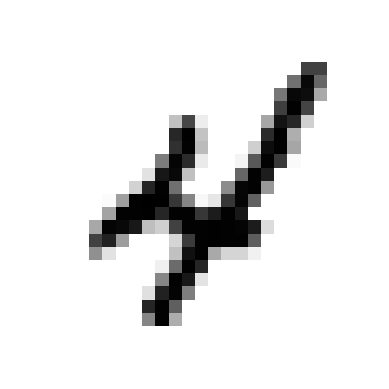

In [6]:
import matplotlib.pyplot as plt

image_vector = X.loc[9]
image = image_vector.to_numpy().reshape(28, 28)

plt.imshow(image, cmap="binary")
plt.axis("off")

In [7]:
y[9]

'4'

In [8]:
y = y.astype(int)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### Binary Classifier

In [10]:
y_train_5 = (y_train  == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train_5)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(kn_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9941, 0.993 , 0.9931])

### Confusion Matrix

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(kn_clf, X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54420,   159],
       [  237,  5184]])

In [15]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred)) 

0.970241437394722
0.9562811289429994


In [16]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.9632107023411371

### Precision / Recall Tradeoff

In [17]:
y_probas = kn_clf.predict_proba([X.loc[0]])
y_probas

d:\programming\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.2, 0.8]])

In [18]:
y_probas = cross_val_predict(kn_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [19]:
from sklearn.metrics import roc_curve

y_probas = y_probas[:, 1]
fpr, tpr, thresholds = roc_curve(y_train_5, y_probas)

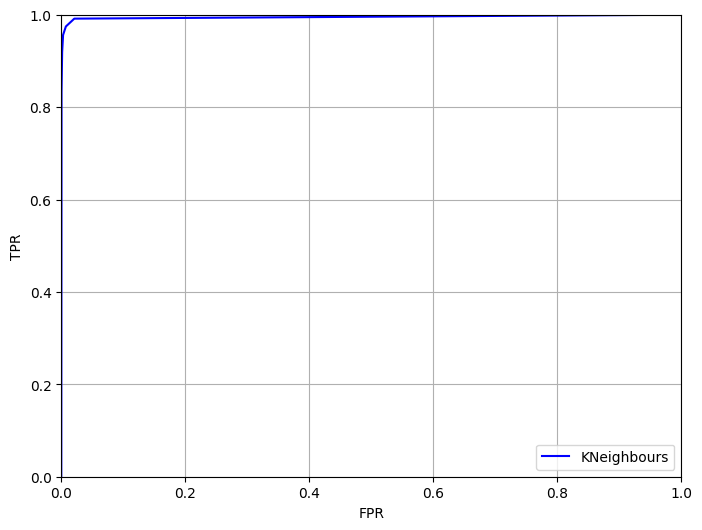

In [20]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.axis([0,1,0,1])
plt.plot(fpr, tpr, "b-", label="KNeighbours")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_probas)

0.9950081362508942

### Multiclass Classification

In [22]:
kn_clf.fit(X_train, y_train)
kn_clf.predict([X.loc[0]])

d:\programming\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([5])

In [23]:
kn_clf.predict_proba([X.loc[0]])

d:\programming\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [24]:
cross_val_score(kn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

### Hyperparameter Tuning 

In [25]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(kn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9376, 0.9411, 0.9424])

In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_neighbors': list(range(1, 22, 2)),
    'weights': ["uniform", "distance"]
}

random_search = RandomizedSearchCV(
    estimator = kn_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    n_jobs=4,
    random_state=42
)

random_search.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_distributions,"{'n_neighbors': [1, 3, ...], 'weights': ['uniform', 'distance']}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,4
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [42]:
import pandas as pd

results_df = pd.DataFrame(random_search.cv_results_)
results_df['accuracy'] = results_df['mean_test_score']
results_df.sort_values(by='accuracy', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,accuracy
9,0.727530,0.011842,44.812964,4.771655,uniform,5,"{'weights': 'uniform', 'n_neighbors': 5}",0.96760,0.96710,0.96755,0.969333,0.000225,5,0.969333
8,0.667099,0.015364,51.253171,0.224283,distance,3,"{'weights': 'distance', 'n_neighbors': 3}",0.97040,0.96890,0.96870,0.968600,0.000759,1,0.968600
6,0.699973,0.011999,50.159875,0.479003,uniform,21,"{'weights': 'uniform', 'n_neighbors': 21}",0.95585,0.95500,0.95770,0.967550,0.001127,10,0.967550
7,0.733305,0.055562,49.613740,0.268794,distance,11,"{'weights': 'distance', 'n_neighbors': 11}",0.96250,0.96245,0.96470,0.967550,0.001049,7,0.967550
5,0.683077,0.013312,49.776567,0.146975,distance,5,"{'weights': 'distance', 'n_neighbors': 5}",0.96880,0.96795,0.96905,0.967417,0.000471,2,0.967417


In [49]:
from sklearn.model_selection import GridSearchCV

param_dist = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ["uniform", "distance"]
}

grid_search = GridSearchCV(
    estimator = kn_clf,
    param_grid=param_dist,
    cv=3,
    scoring="accuracy",
    n_jobs=4,
)

grid_search.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,4
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [50]:
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)
results_df['accuracy'] = results_df['mean_test_score']
results_df.sort_values(by='accuracy', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,accuracy
1,1.257056,0.600776,54.784414,1.848998,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.9704,0.96890,0.96870,0.969333,0.000759,1,0.969333
3,0.945742,0.017179,51.204835,1.108944,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.9688,0.96795,0.96905,0.968600,0.000471,2,0.968600
0,0.818341,0.003834,55.455271,0.930292,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.9690,0.96805,0.96750,0.968183,0.000620,3,0.968183
2,0.943471,0.028406,52.595700,2.286252,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.9676,0.96710,0.96755,0.967417,0.000225,4,0.967417
5,0.908605,0.049519,49.368803,0.442549,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.9670,0.96560,0.96740,0.966667,0.000772,5,0.966667


In [64]:
params = results_df[results_df.rank_test_score == 1]["params"].iloc[0]
model_best = KNeighborsClassifier(**params)
model_best.fit(X_train, y_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
cross_val_score(model_best, X_train, y_train, cv=5, scoring="accuracy")